In [9]:
#Code to simulate birthday paradox problem and visualize insights

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def birthday_problem_simulation(num_people, num_simulations):
    # Initialize a list to store results of each simulation
    shared_birthdays_count = []

    for _ in range(num_simulations):
        # Generate random birthdays for num_people people
        birthdays = [random.randint(1, 365) for _ in range(num_people)]

        # Check for shared birthdays
        if len(set(birthdays)) < num_people:
            shared_birthdays_count.append(1)
        else:
            shared_birthdays_count.append(0)
    
    # Calculate probability of shared birthdays
    probability = sum(shared_birthdays_count) / num_simulations
    
    return probability


In [11]:
# Parameters
num_people_list = list(range(1, 101))  # Number of people from 1 to 100
num_simulations = 10000  # Number of simulations per number of people


In [12]:
# Calculate probabilities for each number of people
probabilities = [birthday_problem_simulation(num_people, num_simulations) for num_people in num_people_list]



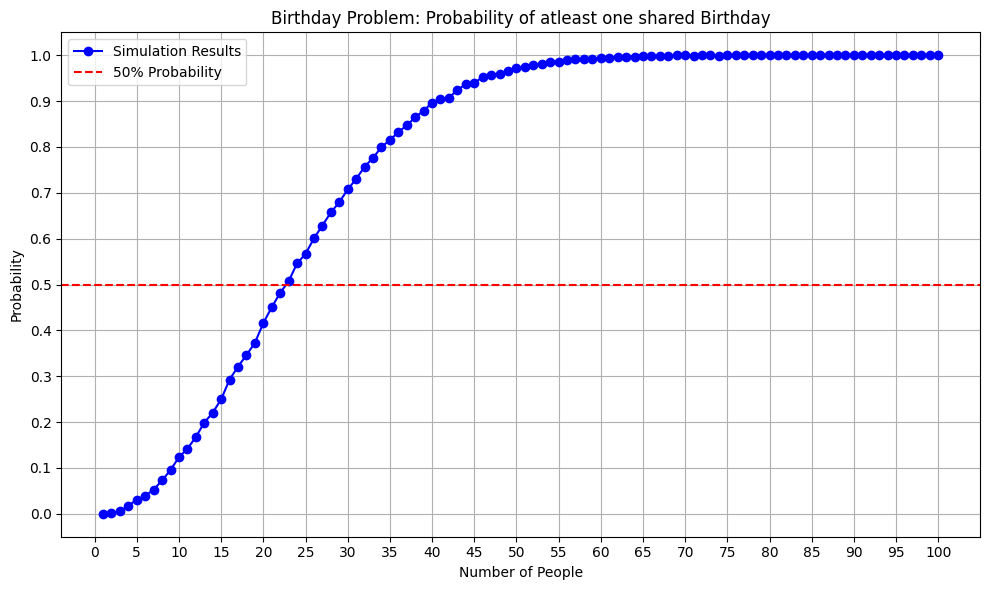

In [15]:
# Visualization
fig=plt.figure(figsize=(10, 6))
plt.plot(num_people_list, probabilities, marker='o', linestyle='-', color='b', label='Simulation Results')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Probability')
plt.title('Birthday Problem: Probability of atleast one shared Birthday')
plt.xlabel('Number of People')
plt.ylabel('Probability')
plt.xticks(range(0, 101, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig("prob_shared_birthday_vs_group_size.pdf",dpi=300, bbox_inches='tight')